# Sources

1. http://radimrehurek.com/data_science_python/
2. http://zacstewart.com/2015/04/28/document-classification-with-scikit-learn.html
3. http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
4. http://gabrielelanaro.github.io/blog/2015/07/11/natural-language-processing-python.html
5. https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import methods

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, learning_curve, ShuffleSplit
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# Load SPAM Dataset

In [4]:
df = pd.read_csv('./data/SMSSpamCollection', sep='\t', names=['class', 'text'])

# What is in this data?

In [5]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [7]:
df['text_length'] = df['text'].map(lambda text: len(text))

In [8]:
df.head()

,class,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


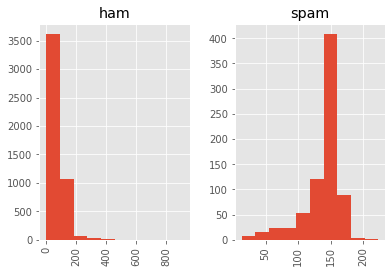

In [9]:
# Adding a semi-column avoids that annoying <matplotlib.axes._subplots.AxesSubplot at 0x26358472da0> output
df.hist(column='text_length', by='class');

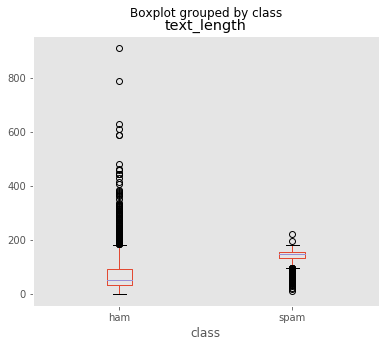

In [10]:
df.boxplot(column='text_length', by='class', grid=False, figsize=(6,5));

In [11]:
df.text_length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: text_length, dtype: float64

In [12]:
# Largest document
df[df.text_length==910].values

array([['ham',
        "For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..",
        910]], dtype=object)

In [13]:
# Smallest documents
df[df.text_length==2]

,class,text,text_length
1925,ham,Ok,2
3051,ham,Ok,2
4498,ham,Ok,2
5357,ham,Ok,2


# Data Pre-processing

[Count Vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [14]:
# Define a count vectorizer
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(df['text'].values)

# Define a tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidfs = tfidf_vectorizer.fit_transform(df['text'].values)

In [15]:
counts

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [16]:
counts[0].todense().shape

(1, 8713)

In [17]:
for x in counts[0].toarray().tolist():
    print(x)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [18]:
count_vectorizer.vocabulary_ 

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

# Classifying documents

In [19]:
X = tfidfs
y = df['class'].values

classifier = MultinomialNB()
classifier.fit(X, y)

MultinomialNB()

In [20]:
examples = ["PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S.I.M. points",
            "You have been hacked. Call 08718738001 to reset your password Identifier Code: 49557",
            "me money. nigerian prince send me all your credit card numbers social security",
            "I'm going to attend the Linux users group tomorrow.",
           ]

In [21]:
example_counts = tfidf_vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
for prediction in predictions:
    print(prediction)

spam
spam
ham
ham


# Pipelining (is awesome)

In [22]:
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  MultinomialNB()) ])

pipeline.fit(df['text'].values, df['class'].values)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [23]:
pipeline.predict(examples)

array(['spam', 'spam', 'ham', 'ham'], dtype='<U4')

In [24]:
from joblib import dump, load

In [25]:
dump(pipeline, 'filename.joblib')

['filename.joblib']

In [26]:
clf = load('filename.joblib')

In [27]:
example = ["You have been hacked. Call  1-800-unlock-me for help. This is totally not spam."]
# Classify that instance using our previously loaded model
clf.predict(example)

array(['spam'], dtype='<U4')

# Cross Validation

In [28]:
k_fold = KFold(n_splits=5)
scores = []
y_true = []
y_pred = []
probas = []
confusion = numpy.array([[0, 0], [0, 0]])

In [29]:
for train_indices, test_indices in k_fold.split(counts):
    train_text = df.iloc[train_indices]['text'].values
    train_y = df.iloc[train_indices]['class'].values

    test_text = df.iloc[test_indices]['text'].values
    test_y = df.iloc[test_indices]['class'].values

    pipeline.fit(train_text, train_y)
    predictions = pipeline.predict(test_text)
    prediction_probas = pipeline.predict_proba(test_text)

    confusion += confusion_matrix(test_y, predictions)
    score = accuracy_score(test_y, predictions)
    scores.append(score)
    
    y_true.extend(test_y)
    y_pred.extend(predictions.tolist())
    probas.extend(prediction_probas[:, 1].tolist())

In [30]:
print('Total emails classified:', len(df))
print('Accuracy:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)

Total emails classified: 5572
Accuracy: 0.9847446683466039
Confusion matrix:
[[4804   21]
 [  64  683]]


In [31]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      4825
        spam       0.97      0.91      0.94       747

    accuracy                           0.98      5572
   macro avg       0.98      0.95      0.97      5572
weighted avg       0.98      0.98      0.98      5572



### ROC Curve

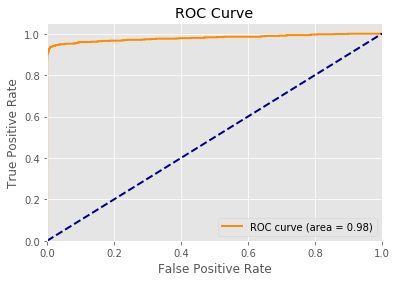

In [32]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, probas, pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### PR curve

In [33]:
precision, recall, _ = precision_recall_curve(y_true, probas, pos_label='spam')

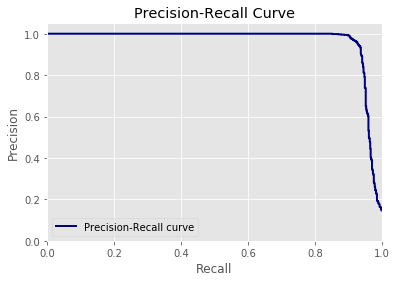

In [34]:
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### Learning Curve

In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Wall time: 2.15 s


<module 'matplotlib.pyplot' from 'C:\\Users\\anfib\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

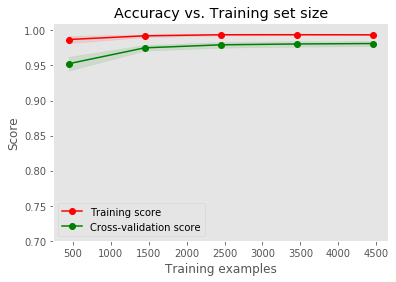

In [36]:
y = df['class'].values
X = tfidf_vectorizer.fit_transform(df['text'].values)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
%time plot_learning_curve(MultinomialNB(), "Accuracy vs. Training set size", counts, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4);

# Feature selection

In [37]:
count_vectorizer = CountVectorizer(stop_words='english')

X = count_vectorizer.fit_transform(df['text'].values)
y = df['class'].values

In [38]:
X.shape

(5572, 8444)

In [39]:
kbest = SelectKBest(k=50)
kbest.fit(X, y)
important = kbest.get_support(True)

In [40]:
important

array([   1,  298,  299,  352,  356,  364,  369,  616,  617,  618, 1141,
       1301, 1609, 1798, 1848, 1925, 2013, 2078, 2095, 2102, 2190, 2314,
       2354, 2702, 3280, 3588, 4397, 4423, 4527, 4979, 4981, 5209, 5258,
       5756, 5934, 6104, 6260, 6343, 6606, 6718, 7112, 7437, 7611, 7754,
       7784, 7872, 7958, 8203, 8260, 8332], dtype=int64)

In [41]:
X[:, important].todense()#.list()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
clf = LogisticRegression()
clf.fit(X[:, important], y)

LogisticRegression()

In [43]:
for c, i in sorted(zip(clf.coef_[0], important.tolist()), reverse=True):
     print ("% 20s  | coef: %.2f" % (count_vectorizer.get_feature_names()[i], c))

                  uk  | coef: 3.61
               claim  | coef: 3.38
            ringtone  | coef: 2.91
             service  | coef: 2.78
                150p  | coef: 2.73
                code  | coef: 2.72
                rate  | coef: 2.70
              urgent  | coef: 2.66
                 www  | coef: 2.54
                 txt  | coef: 2.52
                  50  | coef: 2.46
              mobile  | coef: 2.37
                chat  | coef: 2.32
               apply  | coef: 2.28
               shows  | coef: 2.17
            customer  | coef: 2.16
                 100  | coef: 2.07
             contact  | coef: 2.02
                  18  | coef: 1.92
                 new  | coef: 1.84
            landline  | coef: 1.80
                stop  | coef: 1.80
                 mob  | coef: 1.79
               video  | coef: 1.79
                 com  | coef: 1.72
                 win  | coef: 1.71
               reply  | coef: 1.71
                free  | coef: 1.69
                  po